In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import statsmodels.api as sm

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Create a connection to the SQLite database
conn = sqlite3.connect('data/plots.db')

# Define the SQL query to get comprehensive dataset for analysis
all_data_query = """
SELECT 
    p.doi,
    p.figure_number,
    s.sandstone_name,
    dp.p_mpa,
    dp.q_mpa
FROM data_points dp
JOIN sandstones s ON dp.sandstone_id = s.id
JOIN plots p ON s.plot_id = p.id
ORDER BY p.doi, s.sandstone_name, dp.p_mpa
"""


In [3]:
# Convert the SQL query result into a DataFrame
df_all_data = pd.read_sql_query(all_data_query, conn)

# Display the DataFrame 
df_all_data

,doi,figure_number,sandstone_name,p_mpa,q_mpa
0,10.1016/j.jsg.2012.07.010,5b,"Adamswiller (22.6%), Wong et al. (1997)",32.558140,74.004684
1,10.1016/j.jsg.2012.07.010,5b,"Adamswiller (22.6%), Wong et al. (1997)",56.395349,102.107728
2,10.1016/j.jsg.2012.07.010,5b,"Adamswiller (22.6%), Wong et al. (1997)",80.813953,113.817330
3,10.1016/j.jsg.2012.07.010,5a,"Bentheim (22.8%), Baud et al. (2006)",51.162791,103.255814
4,10.1016/j.jsg.2012.07.010,5a,"Bentheim (22.8%), Baud et al. (2006)",53.488372,112.558140
...,...,...,...,...,...
157,10.1016/j.jsg.2012.08.014,8,Serpentinite (20%),237.942122,287.015945
158,10.1016/j.jsg.2012.08.014,8,Serpentinite (20%),246.945338,277.904328
159,10.1016/j.jsg.2012.08.014,8,Serpentinite (20%),271.382637,305.239180
160,10.1016/j.jsg.2012.08.014,8,Serpentinite (20%),285.530547,300.683371


In [4]:
# Filter for Rutter and Glover Figure 8 data
rut_glov_fig8 = df_all_data[df_all_data['figure_number'] == '8']

# Filter for friction data
friction_data = rut_glov_fig8[rut_glov_fig8['sandstone_name'] == 'Porous sandstone friction data']

# Remove Serpentinite data
rut_glov_fig8 = rut_glov_fig8[(rut_glov_fig8['sandstone_name'] != 'Serpentinite (20%)') & (rut_glov_fig8['sandstone_name'] != 'Porous sandstone friction data')]

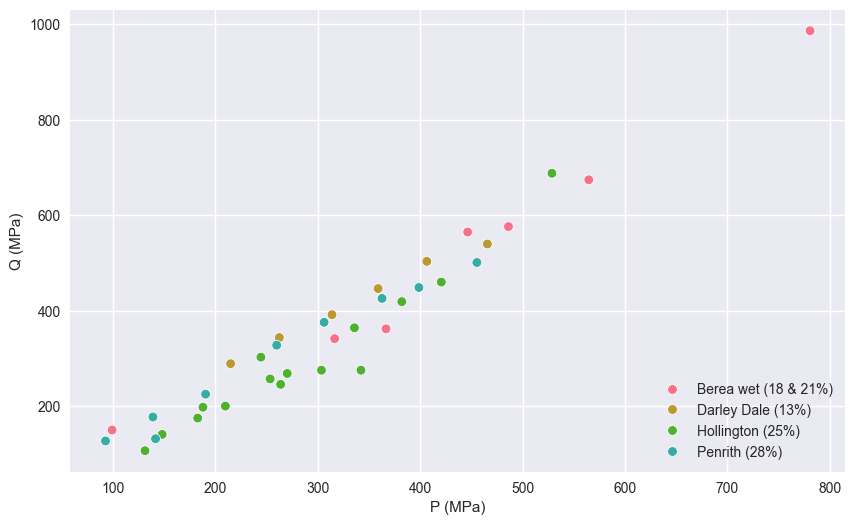

In [5]:
# Visualise the sandstone data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rut_glov_fig8, x='p_mpa', y='q_mpa', hue='sandstone_name')
plt.xlabel('P (MPa)')
plt.ylabel('Q (MPa)')
plt.legend(loc='lower right')
plt.show()

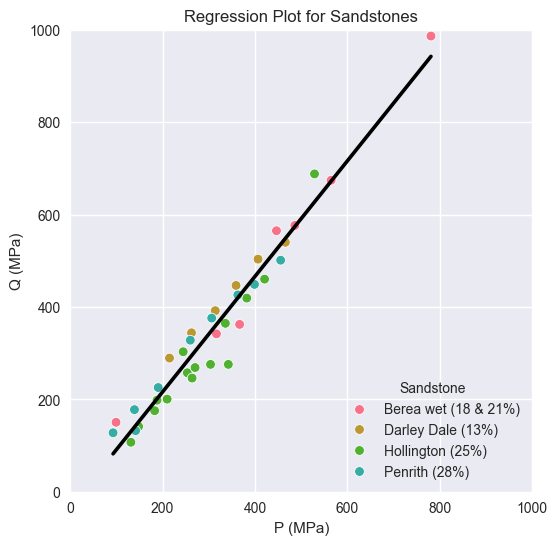

In [19]:
# Create a regression plot for the four sandstones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rut_glov_fig8, x='p_mpa', y='q_mpa', hue='sandstone_name')
sns.regplot(data=rut_glov_fig8, x='p_mpa', y='q_mpa', scatter=False, ci=None, line_kws={'color': 'black'})
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('P (MPa)')
plt.ylabel('Q (MPa)')
plt.legend(loc='lower right', title='Sandstone')
plt.title('Regression Plot for Sandstones')
plt.show()

In [7]:
# OLS Regression
X = rut_glov_fig8['p_mpa']
y = rut_glov_fig8['q_mpa']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  q_mpa   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     700.3
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           9.88e-25
Time:                        13:19:31   Log-Likelihood:                -189.07
No. Observations:                  37   AIC:                             382.1
Df Residuals:                      35   BIC:                             385.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.6597     16.322     -2.062      0.0

In [8]:
w_o_serp = rut_glov_fig8[rut_glov_fig8['sandstone_name'] != 'Serpentinite (20%)']

In [9]:
Xs = w_o_serp['p_mpa']
ys = w_o_serp['q_mpa']
Xs = sm.add_constant(Xs)  # Adds a constant term to the predictor
model = sm.OLS(ys, Xs).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  q_mpa   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     700.3
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           9.88e-25
Time:                        13:19:31   Log-Likelihood:                -189.07
No. Observations:                  37   AIC:                             382.1
Df Residuals:                      35   BIC:                             385.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.6597     16.322     -2.062      0.0

                            OLS Regression Results                            
Dep. Variable:                  q_mpa   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1750.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           3.76e-47
Time:                        13:47:47   Log-Likelihood:                -299.42
No. Observations:                  64   AIC:                             602.8
Df Residuals:                      62   BIC:                             607.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3107      5.074      0.652      0.5

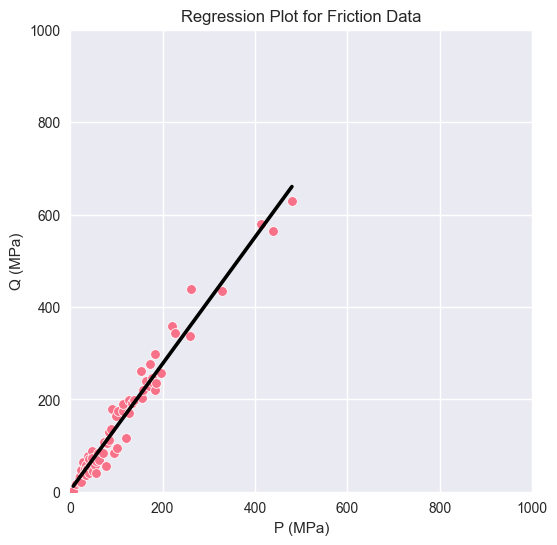

In [20]:
# OLS for friction data
friction_X = friction_data['p_mpa']
friction_y = friction_data['q_mpa']
friction_X = sm.add_constant(friction_X)  # Adds a constant term to the predictor
friction_model = sm.OLS(friction_y, friction_X).fit()
print(friction_model.summary())
# Create a regression plot for the friction data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=friction_data, x='p_mpa', y='q_mpa')
sns.regplot(data=friction_data, x='p_mpa', y='q_mpa', scatter=False, ci=None, line_kws={'color': 'black'})
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('P (MPa)')
plt.ylabel('Q (MPa)')
plt.title('Regression Plot for Friction Data')
plt.show()


## Include Wong & Baud, 2012. Figures 5a,b and 6a,b (Limestones)

In [11]:
new_df = df_all_data[(df_all_data['sandstone_name'] != 'Serpentinite (20%)') & (df_all_data['sandstone_name'] != 'Porous sandstone friction data')]
limestones = new_df[(new_df['figure_number'] == '6a') | (new_df['figure_number'] == '6b')]

# Remove limestones from the main dataset
new_df = new_df[~new_df['sandstone_name'].isin(limestones['sandstone_name'])]
new_df.figure_number.unique()

array(['5b', '5a', '8'], dtype=object)

                            OLS Regression Results                            
Dep. Variable:                  q_mpa   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1368.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           1.92e-44
Time:                        13:19:31   Log-Likelihood:                -331.84
No. Observations:                  65   AIC:                             667.7
Df Residuals:                      63   BIC:                             672.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.9988      7.888      3.169      0.0

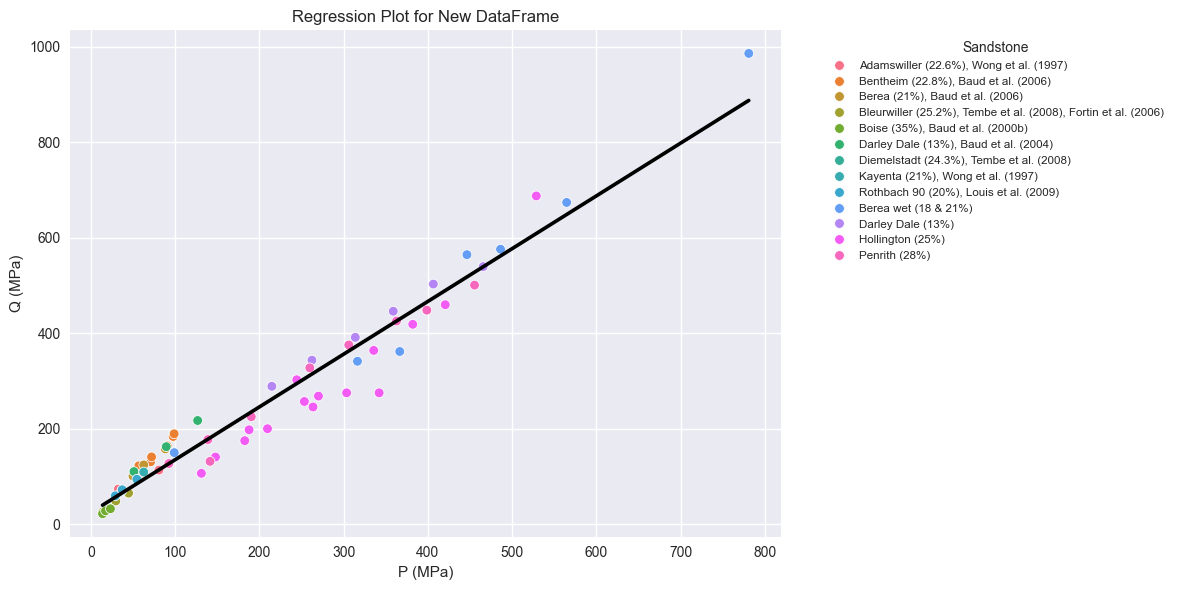

In [12]:
# OLS Regression for new_df
X_new = new_df['p_mpa']
y_new = new_df['q_mpa']
X_new = sm.add_constant(X_new)  # Adds a constant term to the predictor
model_new = sm.OLS(y_new, X_new).fit()
print(model_new.summary())
# Create a regression plot for new_df
plt.figure(figsize=(12, 6))  # Make plot wider
sns.scatterplot(data=new_df, x='p_mpa', y='q_mpa', hue='sandstone_name')
sns.regplot(data=new_df, x='p_mpa', y='q_mpa', scatter=False, ci=None, line_kws={'color': 'black'})
plt.xlabel('P (MPa)')
plt.ylabel('Q (MPa)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Sandstone', fontsize='small')
plt.title('Regression Plot for New DataFrame')
plt.tight_layout()
plt.show()


c:\Users\qmxj311\AppData\Local\anaconda3\envs\env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:                  q_mpa   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     983.5
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           6.96e-13
Time:                        13:19:32   Log-Likelihood:                -59.475
No. Observations:                  14   AIC:                             122.9
Df Residuals:                      12   BIC:                             124.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1381      7.370     -0.019      0.9

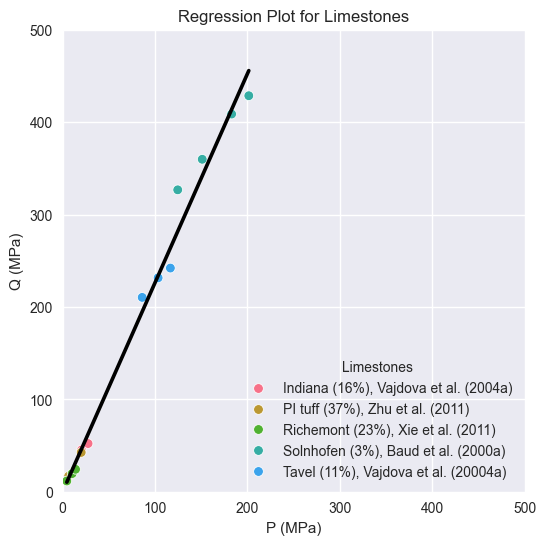

In [13]:

# OLS Regression for limestones
X_limestone = limestones['p_mpa']
y_limestone = limestones['q_mpa']
X_limestone = sm.add_constant(X_limestone)  # Adds a constant term to the
model_limestone = sm.OLS(y_limestone, X_limestone).fit()
print(model_limestone.summary())
# Create a regression plot for limestones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=limestones, x='p_mpa', y='q_mpa', hue='sandstone_name')
sns.regplot(data=limestones, x='p_mpa', y='q_mpa', scatter=False, ci=None, line_kws={'color': 'black'})
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.gca().set_aspect('equal', adjustable='box')  
plt.xlabel('P (MPa)')
plt.ylabel('Q (MPa)')
plt.legend(loc='lower right', title='Limestones')
plt.title('Regression Plot for Limestones')
plt.show()